# Create Soil Netcdf files for LR, MR and HR

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import sqlite3

In [3]:
NODATA = -9999

# Read the sqlite attribute and mapping tables 

In [4]:
# Read sqlite query results into a pandas DataFrame
with sqlite3.connect("/Users/werner-ch/Downloads/wise_05min_v12/wise5x5.db") as con:
    df_base = pd.read_sql_query("SELECT * from WISEunitComposition", con)
    df_attr = pd.read_sql_query("SELECT * from WISEparameterEstimates", con)

    # verify that result of SQL query is stored in the dataframe
    print( df_base.head() )
    print( df_attr.head() )

  ISOC  SUID NEWSUID            SoilMapUnit SOIL1  PROP1  PRID1 SOIL2  PROP2  \
0   WD     0     WD0              Wr1 [WD0]    Wr    100  WD-WR  None    NaN   
1   WD     1     WD1        Af2Be4Ix4 [WD1]    Af     60  WD-Af    Be   20.0   
2   WD     2     WD2      Af3Lg4G5Ix5 [WD2]    Af     50  WD-Af    Lg   30.0   
3   WD     3     WD3  Af3Ap4Gp5Ix5Vp5 [WD3]    Af     40  WD-Af    Ap   30.0   
4   WD     4     WD4           Ao2Bh4 [WD4]    Ao     70  WD-Ao    Bh   30.0   

   PRID2  ... PRID7  SOIL8 PROP8 PRID8  SOIL9 PROP9 PRID9  SOIL10 PROP10  \
0   None  ...  None   None   NaN  None   None  None  None    None   None   
1  WD-Be  ...  None   None   NaN  None   None  None  None    None   None   
2  WD-Lg  ...  None   None   NaN  None   None  None  None    None   None   
3  WD-Ap  ...  None   None   NaN  None   None  None  None    None   None   
4  WD-Bh  ...  None   None   NaN  None   None  None  None    None   None   

  PRID10  
0   None  
1   None  
2   None  
3   None  
4   Non

In [5]:
# extract data for dominant soil and merge
df_base = df_base[['SUID', 'SOIL1', 'PROP1']]
df = pd.merge(df_base, df_attr, left_on='SOIL1', right_on='CLAF')
df.sort_values('SUID')

,SUID,SOIL1,PROP1,CLAF,PRID,Drain,Layer,TopDep,BotDep,CFRAG,...,PHAQ,TCEQ,GYPS,ELCO,TOTC,TOTN,CNrt,ECEC,ALSA,ESP
0,0,Wr,100,Wr,WD-WR,-1,D1,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1
1,0,Wr,100,Wr,WD-WR,-1,D2,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1
2,0,Wr,100,Wr,WD-WR,-1,D3,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1
3,0,Wr,100,Wr,WD-WR,-1,D4,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1
4,0,Wr,100,Wr,WD-WR,-1,D5,-1,-1,-1,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24658,6998,GL,100,GL,WD-GL,-2,D4,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2,-2
24655,6998,GL,100,GL,WD-GL,-2,D1,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2,-2
24656,6998,GL,100,GL,WD-GL,-2,D2,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2,-2
24657,6998,GL,100,GL,WD-GL,-2,D3,-2,-2,-2,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2,-2


# Create spatial base layers to match attributes to

In [6]:
import rasterio
from rasterio.enums import Resampling

with rasterio.open("/Users/werner-ch/Downloads/wise_05min_v12/wise_05min_v12.tif") as dataset: 
    data_HR = dataset.read( out_shape=(dataset.count, dataset.height, dataset.width) )
    data_MR = dataset.read( out_shape=(dataset.count, dataset.height // 3, dataset.width // 3),
                         resampling=Resampling.mode, masked=True )
    data_LR = dataset.read( out_shape=(dataset.count, dataset.height // 6, dataset.width // 6),
                         resampling=Resampling.mode, masked=True )


In [7]:
data_LR.shape, data_MR.shape, data_HR.shape

((1, 281, 720), (1, 562, 1440), (1, 1686, 4320))

In [8]:
def convert_to_nc(filename, res='LR'):
    """convert base dataset to LR, MR or HR resolution netcdf"""

    if res == 'LR':
        conv = 6
        out_shape = (300, 720)
    elif res == 'MR':
        conv = 3
        out_shape = (300*2, 720*2)
    elif res == 'HR':
        conv = 1
        out_shape = (300*6, 720*6)
    else:
        raise NotImplementedError('Use LR, MR or HR')
    
    with rasterio.open(filename) as dataset: 
        data_res = dataset.res[0]
        if res == 'HR':
            data = dataset.read( out_shape=(dataset.count, dataset.height, dataset.width) ).squeeze()   
        else:
            data = dataset.read( out_shape=(dataset.count, dataset.height//conv, dataset.width//conv), resampling=Resampling.mode ).squeeze()   
            
    out_res = data_res * conv

    half = out_res * 0.5

    da = xr.DataArray(data, coords=[('lat', np.arange(84-half, -56.5, -2*half)), ('lon', np.arange(-180+half, 180, 2*half))])
    da = da.where(da>0)
    # extend coords to -60,90 lat
    COORDS=[('lat', np.arange(-60+half, 90, 2*half)), ('lon', np.arange(-180+half, 180, 2*half))]   
    da2 = xr.DataArray(np.ones(out_shape), coords=COORDS)    
    da3 = da.reindex_like(da2, method='pad')

    # add attributes
    ds = da3.to_dataset(name='SUID') 
    ds['lat'].attrs = {'long_name': 'latitude', 'standard_name': 'latitude', 'axis': 'Y'}
    ds['lon'].attrs = {'long_name': 'longitude', 'standard_name': 'longitude', 'axis': 'X'}
    
    return ds

In [9]:
for res in ['LR', 'MR', 'HR']:
    print(f'PROCESSING RES: {res}')
    # read tif and convert resolution using mode on suid
    ds = convert_to_nc('/Users/werner-ch/Downloads/wise_05min_v12/wise_05min_v12.tif', res=res)
    ds.to_netcdf(f'isric-wise-suid_{res}.nc')
    
    nodata_mask = ds.SUID.to_masked_array().mask
    
    # add new lev coordinate for attribute data
    ds['lev'] = xr.DataArray(range(1,6), coords=[('lev', range(1,6))])
    ds = ds.assign_coords({'lev': ds.lev})
    ds['lev'].attrs = {'long_name': 'level', 'standard_name': 'level', 'axis': 'Z'}

    vars = [x for x in df.columns.values if x not in [ 'SUID', 'SOIL1', 'CLAF', 'PSCL', 'PRID', 'Drain', 'Layer', 'TAWK']] 
    for v in vars:
        ds[v] = xr.DataArray(np.empty((len(ds.lev), len(ds.lat), len(ds.lon))), coords=[ds.lev, ds.lat, ds.lon])

    # iterate over soil ids:
    nodata_mask3d = np.empty_like(ds['TopDep'])
    nodata_mask3d = np.broadcast_to(nodata_mask, ds.TopDep.values.shape)

    for v in vars:
        data = ds[v].values
        for suid, g in df.groupby('SUID'):

            if suid > 0:
                mask = ds.SUID==suid
                data[:, mask] = g[v].values[:,np.newaxis]
        if(len(data.shape)==2):
            M = nodata_mask
        else:
            M = nodata_mask3d
        data = np.ma.masked_where(M, data).filled(NODATA)
        ds[v][:] = data
        ds[v].attrs = {'_FillValue': NODATA}

    ds['TotDep'] = ds.BotDep.max(dim='lev')
    ds['TotDep'].attrs = {'_FillValue': NODATA}
    
    # change variable sorting in file
    vars_2d = sorted([v for v in ds.data_vars if len(ds[v].values.shape) == 2])
    vars_3d = sorted([v for v in ds.data_vars if (len(ds[v].values.shape) == 3) and (v not in ['TopDep', 'BotDep']) ])

    ds = ds[vars_2d + ['TopDep', 'BotDep'] + vars_3d]
    
    # write file
    ds.to_netcdf(f'GLOBAL-IRIC-WISE_S1_{res}.nc')
    


PROCESSING RES: LR
PROCESSING RES: MR
PROCESSING RES: HR


In [15]:
# compression
! source activate datascience; nccopy -d1 GLOBAL-IRIC-WISE_S1_HR.nc GLOBAL-IRIC-WISE_S1_HR_comp-d1.nc
! source activate datascience; nccopy -d1 GLOBAL-IRIC-WISE_S1_MR.nc GLOBAL-IRIC-WISE_S1_MR_comp-d1.nc
! source activate datascience; nccopy -d1 GLOBAL-IRIC-WISE_S1_LR.nc GLOBAL-IRIC-WISE_S1_LR_comp-d1.nc

## Some plotting

<xarray.Dataset>
Dimensions:  (lat: 600, lon: 1440)
Coordinates:
  * lat      (lat) float64 -59.88 -59.63 -59.38 -59.13 ... 89.37 89.62 89.87
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    SUID     (lat, lon) float64 ...


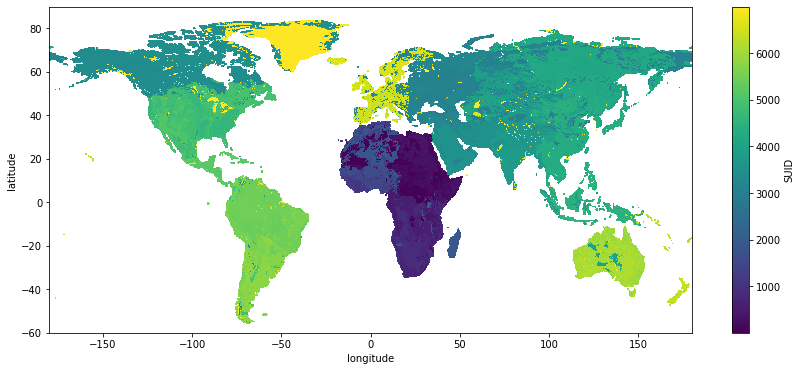

In [62]:
res='MR'
with xr.open_dataset(f'isric-wise-suid_{res}.nc') as ds:
    print(ds)
ds.SUID.plot(figsize=(14.4, 6));
nodata_mask = ds.SUID.to_masked_array().mask

In [11]:
! ls -l isric*

-rw-r--r--  1 werner-ch  901  62264704 Oct  1 15:33 isric-wise-suid_HR.nc
-rw-r--r--  1 werner-ch  901   1743904 Oct  1 15:27 isric-wise-suid_LR.nc
-rw-r--r--  1 werner-ch  901   6936064 Oct  1 15:29 isric-wise-suid_MR.nc


In [13]:
! ls -lh GLOBAL*

-rw-r--r--  1 werner-ch  901   6.5G Oct  1 15:59 GLOBAL-IRIC-WISE_S1_HR.nc
-rw-r--r--  1 werner-ch  901   185M Oct  1 15:29 GLOBAL-IRIC-WISE_S1_LR.nc
-rw-r--r--  1 werner-ch  901   738M Oct  1 15:33 GLOBAL-IRIC-WISE_S1_MR.nc
